In [231]:
import pandas as pd
import numpy as np

#scaling 클래스 
from sklearn.preprocessing import scale, minmax_scale, robust_scale

import matplotlib 
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

matplotlib.rc('font',family = "Malgun Gothic")
plt.rc('font',family = 'Malgun Gothic')


#seaborn 에서 한글 깨짐 해결, unicode_minus 사용하지 않기 위한 설정 
plt.rcParams['axes.unicode_minus'] = False

In [232]:
df = pd.read_csv("data/titanic.csv", engine = "python", encoding = 'cp949')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
df.shape

(891, 12)

In [234]:
# 기술통계량 확인
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [235]:
#데이터의 속성 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 데이터전처리

~~Survived: 생존여부~~

~~pclass :승객등급 1,2,3 등석~~

Name: 승객 이름  

~~Sex: 성별~~  

~~Age: 나이~~  

SibSp: 동승한 배우자, 형제, 가족인원수  

Parch: 동승한 부모님 수  

Ticket: 티켓 번호 . 이 티켓번호도 PassengerId와 마찬가지로 특정 조건이 주어지지 않는다면 큰 의미를 갖지는 못하는 것처럼 보임
 
Fare: 운임 요금  

~~Cabin: 객실 구역.~~   

Embarked: 어디서 탑승했는지 등에 대한 정보  

In [236]:
# Cabin 칼럼의 열 모두 drop 
df = df.drop('Cabin',axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [237]:
df.shape

(891, 11)

In [238]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [239]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [240]:
df= df.astype({'PassengerId':object,'Pclass':object,'Survived':object})

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 76.7+ KB


In [242]:
for col in df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 0.00%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.22%


In [244]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [246]:
df.loc[61, 'Embarked'] = 'S'
df.loc[829, 'Embarked'] = 'S'

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 76.7+ KB


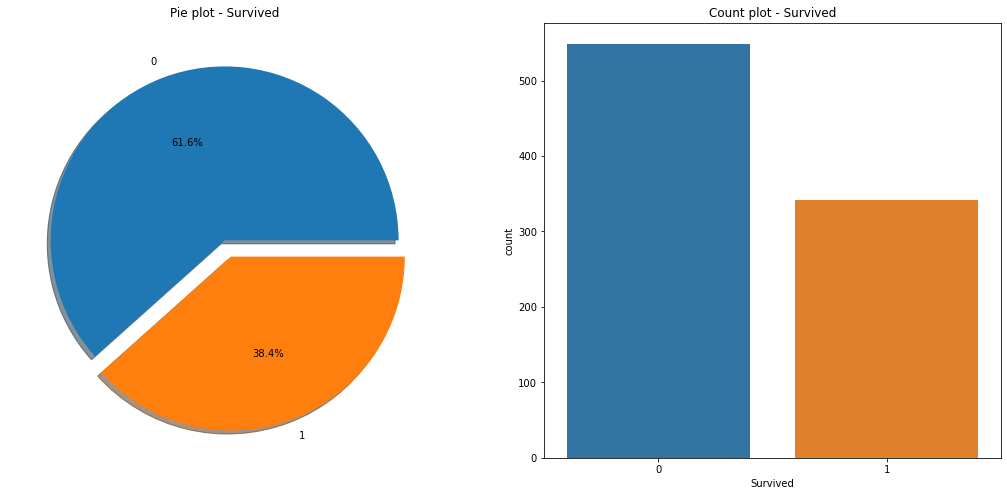

In [257]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## 가설설정1. 여성이 남성보다 생존률이 높을 것이다.  

Text(0.5, 1.0, 'Survived (male)')

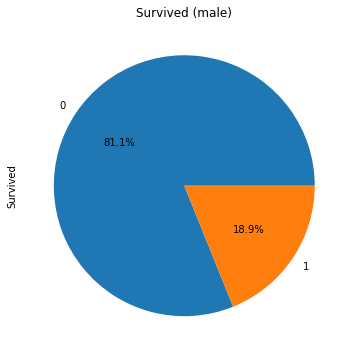

In [147]:
t = plt.subplots(1,figsize=(15,6))
df_raw['Survived'][df_raw['Sex']=='male'].value_counts().plot.pie(autopct='%1.1f%%')
t[1].set_title('Survived (male)')

Text(0.5, 1.0, 'Survived (female)')

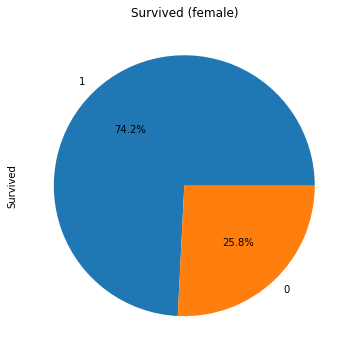

In [148]:
t = plt.subplots(1,figsize=(15,6))
df_raw['Survived'][df_raw['Sex']=='female'].value_counts().plot.pie(autopct='%1.1f%%')
t[1].set_title('Survived (female)')

남자의 사망률 81.1%, 여자의 사망률 25.8% 로 여자일수록 생존 확률이 더 높게 나타난다.

## 가설설정2 : 나이가 어릴수록 생존률이 높을 것이다. 

In [274]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.8 Years


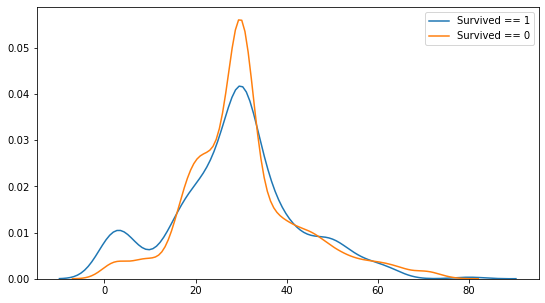

In [276]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

생존자 중 나이가 어린 경우가 많음을 알수있다.

## 가설설정3 : Pclass가 높을수록 생존률이 높을 것이다. 

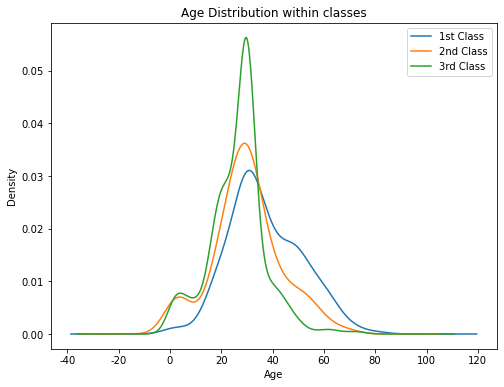

In [277]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df['Age'][df['Pclass'] == 1].plot(kind='kde')
df['Age'][df['Pclass'] == 2].plot(kind='kde')
df['Age'][df['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Class 가 높을 수록(1st로 갈수록) 나이 많은 사람의 비중이 커진다.

In [259]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [260]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [261]:
pd.crosstab(df['Pclass'], df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


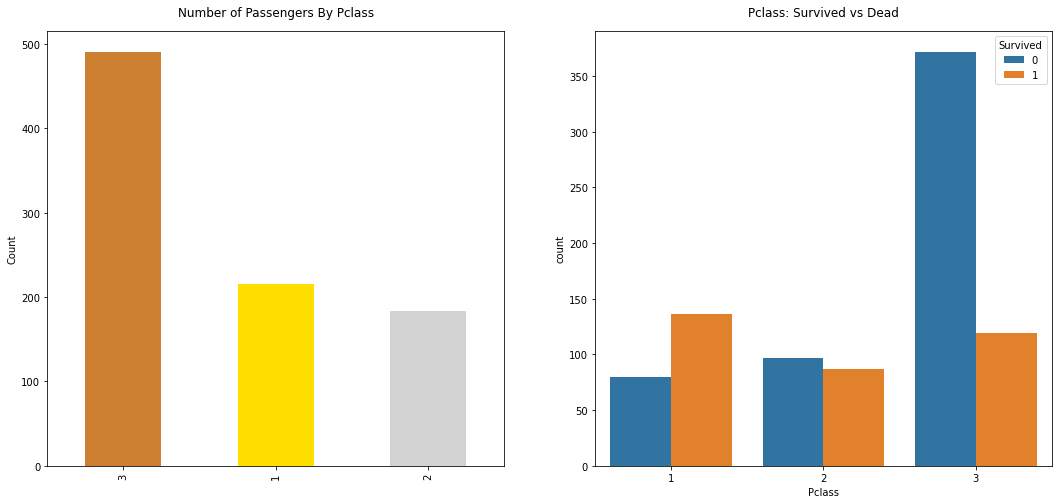

In [269]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

class 1 -> 3 으로 갈수록 생존률이 낮아진다.

## 가설설정4 : pclass와 성별에 따라 차이가 있을것이다

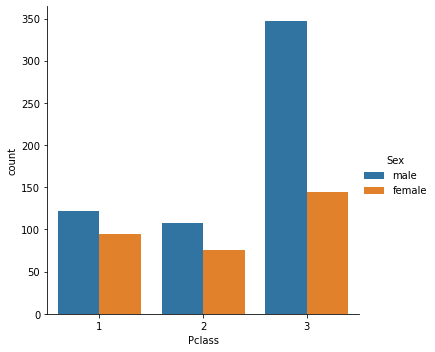

In [105]:
#좌석의 등급에 따라 성비확인 
sns.factorplot('Pclass', kind='count', hue='Sex', data=df_raw)

승객등급이 3등급으로 갈수록 남성의 수가 많다.

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


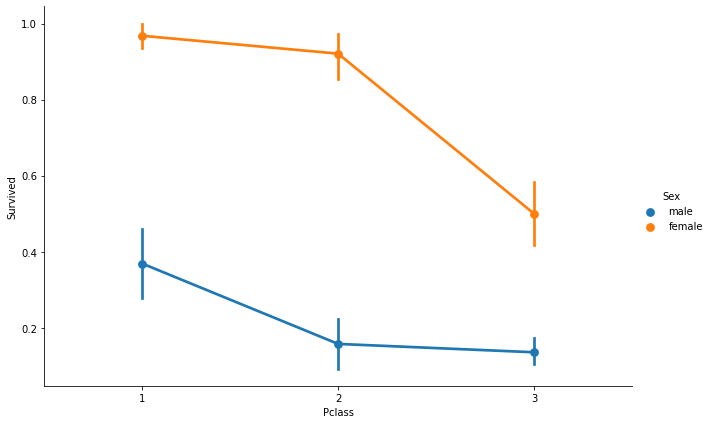

In [270]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df, 
               size=6, aspect=1.5)

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


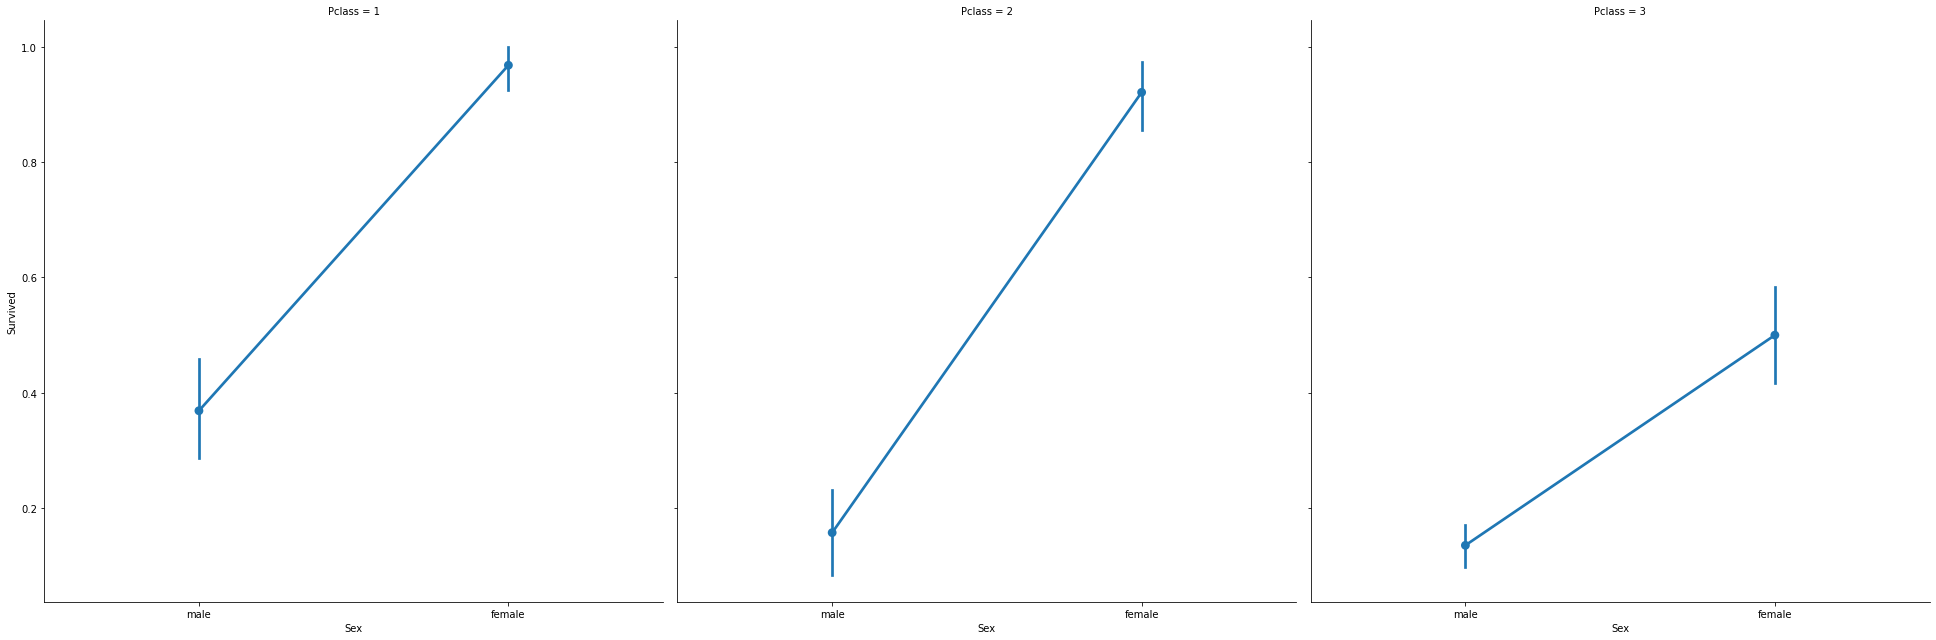

In [273]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df, satureation=.5,
               size=9, aspect=1)

모든 클래스에서 female 이 살 확률이 male 보다 높다.  
또한 남자, 여자 상관없이 클래스가 높을 수록(first class일수록) 살 확률 높다.

## 가설설정5 : 항구에 따라 생존률 차이가 날 것이다.

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


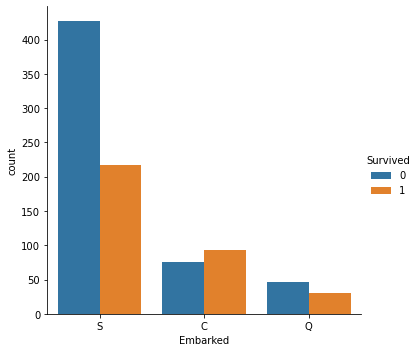

In [221]:
#항구에 따른 생존현황
sns.factorplot('Embarked', kind='count', hue='Survived', data=df_raw)

C에서 탑승한 승객이 가장 생존률이 높다.

# 가설설정6 : pclass 와 항구에 따른 생존률의 차이가 있을것이다

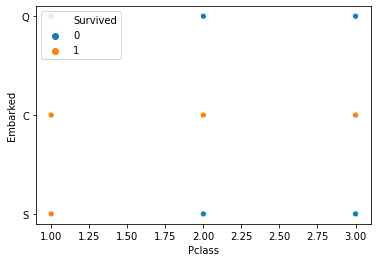

In [226]:
sns.scatterplot(x="Pclass",y="Embarked",hue = "Survived", data =df_raw)

pclass와 항구에 따른 큰 연관은 없다.

## 가설설정7 : 가족수에 따라 생존률이 차이가 날 것이다

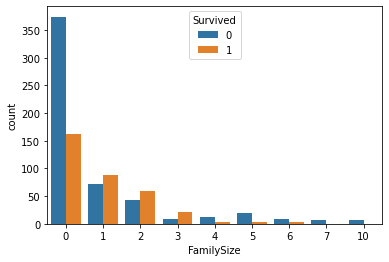

In [291]:
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.countplot('FamilySize', hue='Survived', data = df)

혼자 탑승한 경우의 사망율이 더 높다.   
1-3명의 가족과 동승했을시 생존률이 더 높고, 그 이상의 경우 사망률이 높다.

결론  
1. 여성이 남성에 비해 생존확률이 높다.  
2. 나이가 어릴수록 생존률이 높다.
3. First Class일 수록 생존률이 높다.
4. 항구 C에서 탑승한 승객이 생존률이 높다.
5. 가족과는 1~3명과 동승한 경우 생존할 확률이 높다.

참고자료
https://kaggle-kr.tistory.com/17